In [417]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [418]:
import scipy.linalg as slg

In [419]:
#Command line args
Nx = 25
Ny = 25
radius = 8
Niter = 1500

In [427]:
phi = np.zeros((Ny,Nx))

In [428]:
if Nx % 2 ==1:
    endx = (Nx-1)//2
    x = np.arange(-endx,endx+1)
if Ny % 2 ==1:
    endy = (Ny-1)//2
    y = np.asarray(range(+endy,-endy-1,-1))

X,Y = np.meshgrid(x,y)
ii = np.where(X*X + Y*Y <= radius**2)
phi[ii] =1

In [429]:
Y

array([[ 12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,
         12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12],
       [ 11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,
         11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11],
       [ 10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,
         10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10],
       [  9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
          9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9],
       [  8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
          8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8],
       [  7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
          7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7],
       [  6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
          6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6],
      

In [430]:
X

array([[-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
      

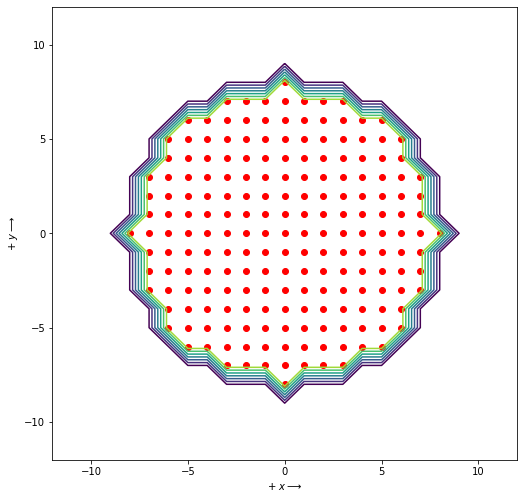

In [431]:
fig,ax = plt.subplots(figsize=(Nx/3,Ny/3),num =0)
plt.xlabel(r'+ $x\longrightarrow$')
plt.ylabel(r'+ $y\longrightarrow$')
ax.contour(X,Y,phi)
ax.scatter(ii[1]-endx,ii[0]-endy,marker = 'o', color ='r')


In [432]:
errors = np.zeros(Niter)
for k in range(Niter):
    oldphi = phi.copy()
    phi[1:-1,1:-1] = 0.25*(phi[1:-1,0:-2] + phi[1:-1,2:] + phi[0:-2,1:-1] + phi[2:,1:-1])
    phi[ii] =1
    phi[1:-1,0] = phi[1:-1,1]
    phi[1:-1,-1] = phi[1:-1,-2]
    phi[0,1:-1] = phi[1,1:-1]
    errors[k] = np.max(np.abs(phi-oldphi))

In [433]:
phi

array([[0.        , 0.99607632, 0.99623869, 0.99654288, 0.99695153,
        0.99741727, 0.99789119, 0.9983312 , 0.99870811, 0.99900653,
        0.99922041, 0.99935017, 0.99939489, 0.99935017, 0.99922041,
        0.99900653, 0.99870811, 0.9983312 , 0.99789119, 0.99741727,
        0.99695153, 0.99654288, 0.99623869, 0.99607632, 0.        ],
       [0.99607632, 0.99607632, 0.99623869, 0.99654288, 0.99695153,
        0.99741727, 0.99789119, 0.9983312 , 0.99870811, 0.99900653,
        0.99922041, 0.99935017, 0.99939489, 0.99935017, 0.99922041,
        0.99900653, 0.99870811, 0.9983312 , 0.99789119, 0.99741727,
        0.99695153, 0.99654288, 0.99623869, 0.99607632, 0.99607632],
       [0.99591395, 0.99591395, 0.99609688, 0.99643842, 0.99689444,
        0.9974091 , 0.99792509, 0.9983943 , 0.99878661, 0.99909107,
        0.99930453, 0.99943521, 0.99948432, 0.99943521, 0.99930453,
        0.99909107, 0.99878661, 0.9983943 , 0.99792509, 0.9974091 ,
        0.99689444, 0.99643842, 0.99609688, 0.

In [434]:
i = np.arange(1,Niter+1)
one_array = np.ones(Niter)
M = np.c_[one_array,i]
M_500 = np.c_[one_array[500:],i[500:]]
v = slg.lstsq(M,np.log(errors))[0]
v_500 = slg.lstsq(M_500,np.log(errors[500:]))[0]

In [435]:
errors

array([5.00000000e-01, 1.87500000e-01, 1.09375000e-01, ...,
       1.39890322e-11, 1.37919676e-11, 1.35974565e-11])

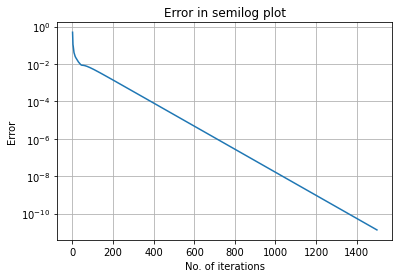

In [436]:
fig,ax = plt.subplots(num =1)
plt.semilogy(i,errors)
plt.xlabel(r'No. of iterations') # Labels
plt.ylabel(r'Error')
plt.title(r'Error in semilog plot')
plt.grid();

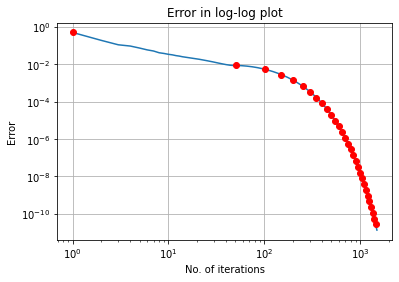

In [437]:
fig,ax = plt.subplots(num =2)
ax.loglog(i,errors, label='Error')
ax.loglog(i[::50],errors[::50], 'ro',label ='Every 50th value')
plt.xlabel(r'No. of iterations')
plt.ylabel(r'Error')
plt.title(r'Error in log-log plot')
plt.grid();

In [248]:
error_lstsq = np.exp(np.dot(M,v))

In [249]:
error500_lstsq = np.exp(np.dot(M_500,v_500))

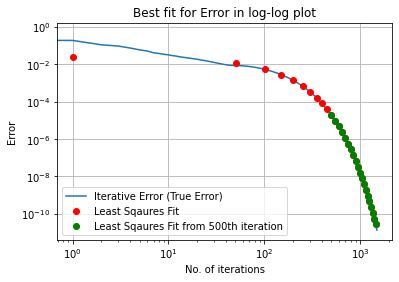

In [250]:
fig,ax = plt.subplots(num =3)
ax.loglog(errors, label='Iterative Error (True Error)')
ax.loglog(i[::50],error_lstsq[::50],'ro', label = 'Least Sqaures Fit')
ax.loglog(i[500::50],error500_lstsq[::50],'go', label = 'Least Sqaures Fit from 500th iteration')
plt.xlabel(r'No. of iterations')
plt.ylabel(r'Error')
plt.title(r'Best fit for Error in log-log plot');
plt.legend()
plt.grid();

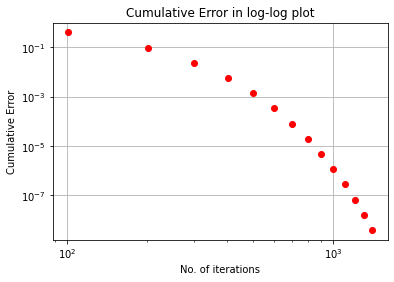

In [251]:
A = np.exp(v[0])
B = v[1]
def cum_error(x):
    return -A/B*np.exp(B*(x+0.5))

fig, ax = plt.subplots(num =4)
ax.loglog(i[100::100],cum_error(i[100::100]),'ro')
plt.xlabel(r'No. of iterations')
plt.ylabel(r'Cumulative Error')
plt.title(r'Cumulative Error in log-log plot')
plt.grid();

<a list of 7 text.Text objects>

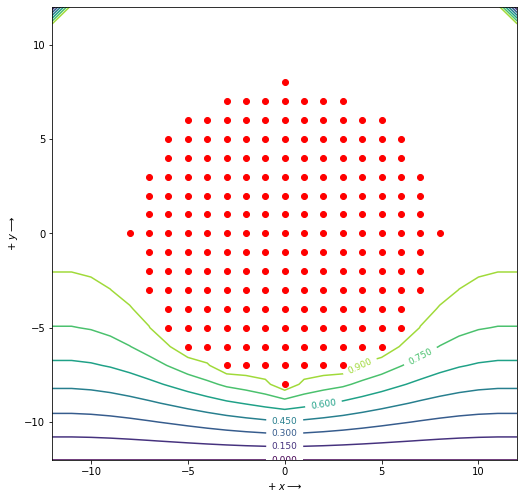

In [438]:
fig,ax = plt.subplots(figsize=(Nx/3,Ny/3),num =5)
plt.xlabel(r'+ $x\longrightarrow$')
plt.ylabel(r'+ $y\longrightarrow$')
cs = ax.contour(X,Y,phi)
plt.scatter(ii[1]-endx,ii[0]-endy,marker = 'o', color ='r')
ax.clabel(cs, inline =1, fontsize = 9) 

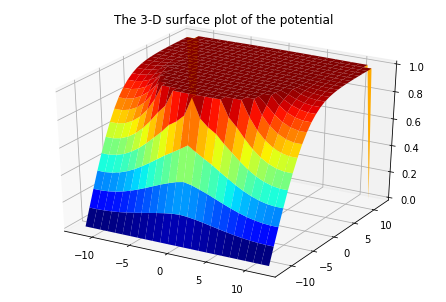

In [439]:
fig1=plt.figure(6)     # open a new figure
ax=p3.Axes3D(fig1) # Axes3D is the means to do a surface plot
plt.title('The 3-D surface plot of the potential')
surf = ax.plot_surface(X, Y, phi, rstride=1, cstride=1, cmap=plt.cm.jet)

In [440]:
Jx = 0.5*(phi[1:-1,:-2]-phi[1:-1,2:]) # 0.5*(phi(x-1,y) - phi(x+1,y)) in cartesian
Jy = 0.5*(phi[2:,1:-1]-phi[:-2,1:-1]) # 0.5*(phi(x, y-1) - phi(x,y+1)) in cartesian

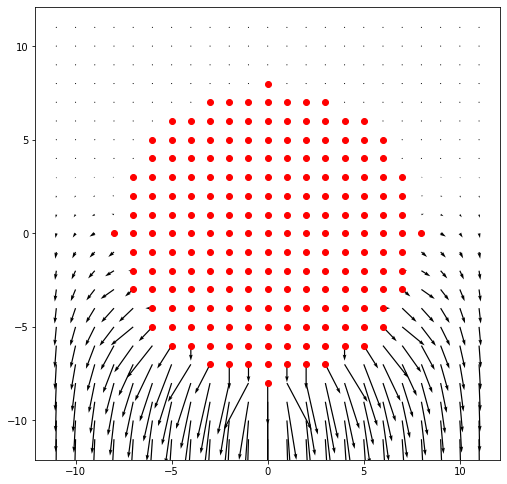

In [446]:
fig,ax = plt.subplots(figsize=(Nx/3,Ny/3),num =7)
ax.quiver(X[1:-1,1:-1],Y[1:-1,1:-1],Jx,Jy)
ax.scatter(ii[1]-endx,ii[0]-endy,marker = 'o', color ='r')